<a href="https://colab.research.google.com/github/iamJagruthi/Recognition-of-Renal-Disease/blob/main/Recognition%20of%20Renal%20Disease.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/kidney_disease_final.csv')


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 25 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   age                      400 non-null    float64
 1   blood_pressure           400 non-null    float64
 2   specific_gravity         400 non-null    float64
 3   albumin                  400 non-null    float64
 4   sugar                    400 non-null    float64
 5   red_blood_cells          400 non-null    float64
 6   pus_cell                 400 non-null    float64
 7   pus_cell_clumps          400 non-null    float64
 8   bacteria                 400 non-null    float64
 9   blood_glucose_random     400 non-null    float64
 10  blood_urea               400 non-null    float64
 11  serum_creatinine         400 non-null    float64
 12  sodium                   400 non-null    float64
 13  potassium                400 non-null    float64
 14  haemoglobin              4

In [ ]:
df.columns

Index(['age', 'blood_pressure', 'specific_gravity', 'albumin', 'sugar',
       'red_blood_cells', 'pus_cell', 'pus_cell_clumps', 'bacteria',
       'blood_glucose_random', 'blood_urea', 'serum_creatinine', 'sodium',
       'potassium', 'haemoglobin', 'packed_cell_volume',
       'white_blood_cell_count', 'red_blood_cell_count', 'hypertension',
       'diabetes_mellitus', 'coronary_artery_disease', 'appetite',
       'pedal_edema', 'anemia', 'classification'],
      dtype='object')

In [ ]:
df.describe()

,age,blood_pressure,specific_gravity,albumin,sugar,red_blood_cells,pus_cell,pus_cell_clumps,bacteria,blood_glucose_random,blood_urea,serum_creatinine,sodium,potassium,haemoglobin,packed_cell_volume,white_blood_cell_count,red_blood_cell_count,hypertension,diabetes_mellitus,coronary_artery_disease,appetite,pedal_edema,anemia,classification
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.00000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,51.483300,76.469100,1.017712,1.017300,0.450125,0.810300,0.772625,0.106100,0.055600,148.036900,57.425925,3.07235,137.529025,4.627850,12.526900,38.883700,8406.121800,4.708275,0.369350,0.344200,0.085450,0.794475,0.190475,0.150375,0.625000
std,16.974966,13.476298,0.005434,1.272318,1.029487,0.308983,0.383751,0.306756,0.228199,74.782634,49.285887,5.61749,9.204273,2.819783,2.716171,8.151082,2523.219976,0.840315,0.482023,0.474518,0.279166,0.404077,0.392677,0.357440,0.484729
min,2.000000,50.000000,1.005000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,22.000000,1.500000,0.40000,4.500000,2.500000,3.100000,9.000000,2200.000000,2.100000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,42.000000,70.000000,1.015000,0.000000,0.000000,0.810000,0.770000,0.000000,0.000000,101.000000,27.000000,0.90000,135.000000,4.000000,10.875000,34.000000,6975.000000,4.500000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
50%,54.000000,78.235000,1.020000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,126.000000,44.000000,1.40000,137.530000,4.630000,12.530000,38.880000,8406.120000,4.710000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000
75%,64.000000,80.000000,1.020000,2.000000,0.450000,1.000000,1.000000,0.000000,0.000000,150.000000,61.750000,3.07000,141.000000,4.800000,14.625000,44.000000,9400.000000,5.100000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000
max,90.000000,180.000000,1.025000,5.000000,5.000000,1.000000,1.000000,1.000000,1.000000,490.000000,391.000000,76.00000,163.000000,47.000000,17.800000,54.000000,26400.000000,8.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
df.shape

(400, 25)

In [ ]:
df.head().T

,0,1,2,3,4
age,48.00,7.00,62.00,48.000,51.00
blood_pressure,80.00,50.00,80.00,70.000,80.00
specific_gravity,1.02,1.02,1.01,1.005,1.01
albumin,1.00,4.00,2.00,4.000,2.00
sugar,0.00,0.00,3.00,0.000,0.00
red_blood_cells,0.81,0.81,1.00,1.000,1.00
pus_cell,1.00,1.00,1.00,0.000,1.00
pus_cell_clumps,0.00,0.00,0.00,1.000,0.00
bacteria,0.00,0.00,0.00,0.000,0.00
blood_glucose_random,121.00,148.04,423.00,117.000,106.00


In [ ]:
X = df.values[:, 0:24]
y = df.values[:, -1]

In [ ]:
from sklearn.model_selection import train_test_split


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 0)


In [ ]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
!pip install scikit-plot
import scikitplot as skplt


In [ ]:
import scikitplot as skplt


# **KNN**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train)
knn_acc = accuracy_score(y_test, knn.predict(X_test))
print(f"Training Accuracy of KNN is {accuracy_score(y_train, knn.predict(X_train))}")
print(f"Test Accuracy of KNN is {knn_acc} \n")
print(f"Confusion Matrix :- \n{confusion_matrix(y_test, knn.predict(X_test))}\n")
print(f"Classification Report :- \n {classification_report(y_test, knn.predict(X_test))}")

Training Accuracy of KNN is 1.0
Test Accuracy of KNN is 0.8333333333333334 

Confusion Matrix :- 
[[39  9]
 [11 61]]

Classification Report :- 
               precision    recall  f1-score   support

         0.0       0.78      0.81      0.80        48
         1.0       0.87      0.85      0.86        72

    accuracy                           0.83       120
   macro avg       0.83      0.83      0.83       120
weighted avg       0.83      0.83      0.83       120



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_roc instead.
  warnings.warn(msg, category=FutureWarning)


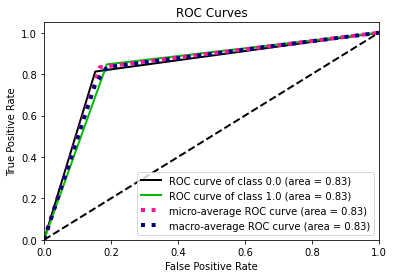

In [ ]:
y_probas = knn.predict_proba(X_test)
skplt.metrics.plot_roc_curve(y_test, y_probas)
plt.show()

# **Cross Validation**

In [ ]:
from numpy import mean
from numpy import std
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
cv = KFold(n_splits=10, random_state=1, shuffle=True)
knn_model = KNeighborsClassifier(n_neighbors=1)
scores = cross_val_score(knn_model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
print('Accuracy: %.3f (%.3f)' % (mean(scores), std(scores)))

Accuracy: 0.802 (0.045)


In [ ]:
for k in range(2,12):
 cv = KFold(n_splits=k, random_state=1, shuffle=True)
 scores = cross_val_score(knn_model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
 print('Accuracy: %.3f (%.3f)' % (mean(scores), std(scores)))

Accuracy: 0.740 (0.000)
Accuracy: 0.820 (0.012)
Accuracy: 0.802 (0.011)
Accuracy: 0.815 (0.018)
Accuracy: 0.817 (0.034)
Accuracy: 0.797 (0.043)
Accuracy: 0.795 (0.048)
Accuracy: 0.795 (0.047)
Accuracy: 0.802 (0.045)
Accuracy: 0.790 (0.053)


# **Random Forest**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rd_clf = RandomForestClassifier(criterion = 'entropy', max_depth = 11, max_features = 'auto', min_samples_leaf = 2, min_samples_split = 3, n_estimators = 110)
rd_clf.fit(X_train, y_train)
rd_clf_acc = accuracy_score(y_test, rd_clf.predict(X_test))
print(f"Training Accuracy of Random Forest Classifier is {accuracy_score(y_train, rd_clf.predict(X_train))}")
print(f"Test Accuracy of Random Forest Classifier is {rd_clf_acc} \n")
print(f"Confusion Matrix :- \n{confusion_matrix(y_test, rd_clf.predict(X_test))}\n")
print(f"Classification Report :- \n {classification_report(y_test, rd_clf.predict(X_test))}")

Training Accuracy of Random Forest Classifier is 1.0
Test Accuracy of Random Forest Classifier is 0.9666666666666667 

Confusion Matrix :- 
[[44  4]
 [ 0 72]]

Classification Report :- 
               precision    recall  f1-score   support

         0.0       1.00      0.92      0.96        48
         1.0       0.95      1.00      0.97        72

    accuracy                           0.97       120
   macro avg       0.97      0.96      0.96       120
weighted avg       0.97      0.97      0.97       120



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_roc instead.
  warnings.warn(msg, category=FutureWarning)


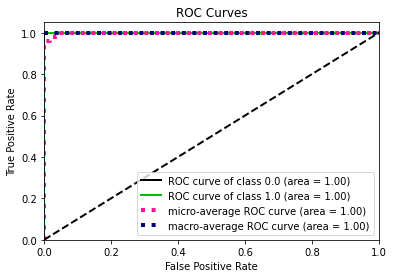

In [ ]:
y_probas = rd_clf.predict_proba(X_test)
skplt.metrics.plot_roc_curve(y_test, y_probas)
plt.show()

# **Gaussian Naive Bayes**

In [ ]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train, y_train)
gnb_acc = accuracy_score(y_test, gnb.predict(X_test))
print(f"Training Accuracy of NB is {accuracy_score(y_train, gnb.predict(X_train))}")
print(f"Test Accuracy of NB is {gnb_acc} \n")
print(f"Confusion Matrix :- \n{confusion_matrix(y_test, gnb.predict(X_test))}\n")
print(f"Classification Report :- \n {classification_report(y_test, gnb.predict(X_test))}")


Training Accuracy of NB is 0.9607142857142857
Test Accuracy of NB is 0.9416666666666667 

Confusion Matrix :- 
[[44  4]
 [ 3 69]]

Classification Report :- 
               precision    recall  f1-score   support

         0.0       0.94      0.92      0.93        48
         1.0       0.95      0.96      0.95        72

    accuracy                           0.94       120
   macro avg       0.94      0.94      0.94       120
weighted avg       0.94      0.94      0.94       120



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_roc instead.
  warnings.warn(msg, category=FutureWarning)


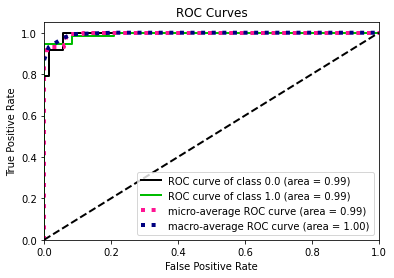

In [ ]:
y_probas = gnb.predict_proba(X_test)
skplt.metrics.plot_roc_curve(y_test, y_probas)
plt.show()

# **XGBoost**

In [ ]:
from xgboost import XGBClassifier
xgb = XGBClassifier(learning_rate = 0.01, max_depth = 5, n_estimators = 100, random_state=0,use_label_encoder=False,min_child_weight = 1,
                   gamma=0, subsample=0.9)
xgb.fit(X_train, y_train)
xgb_acc = accuracy_score(y_test, xgb.predict(X_test))
print(f"Training Accuracy of XgBoost is {accuracy_score(y_train, xgb.predict(X_train))}")
print(f"Test Accuracy of XgBoost is {xgb_acc} \n")
print(f"Confusion Matrix :- \n{confusion_matrix(y_test, xgb.predict(X_test))}\n")
print(f"Classification Report :- \n {classification_report(y_test, xgb.predict(X_test))}")

Training Accuracy of XgBoost is 0.9857142857142858
Test Accuracy of XgBoost is 0.9916666666666667 

Confusion Matrix :- 
[[47  1]
 [ 0 72]]

Classification Report :- 
               precision    recall  f1-score   support

         0.0       1.00      0.98      0.99        48
         1.0       0.99      1.00      0.99        72

    accuracy                           0.99       120
   macro avg       0.99      0.99      0.99       120
weighted avg       0.99      0.99      0.99       120



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_roc instead.
  warnings.warn(msg, category=FutureWarning)


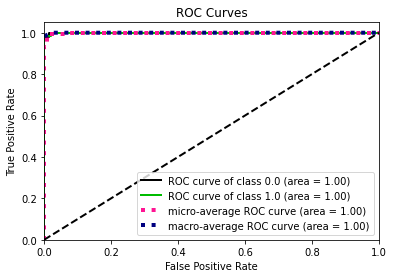

In [ ]:
y_probas = xgb.predict_proba(X_test)
skplt.metrics.plot_roc_curve(y_test, y_probas)
plt.show()